# Problem 1

In [62]:
#Q1.Probability that distributor will reject the lot if it tests 5 chips from 125 chips

import numpy as np
import random
import matplotlib.pyplot as plt

def reject(trials,chips,defects):
    samp = list(range(defects))
    rejects = 0
    for i in range(trials):
        perm = np.random.choice(125,chips,replace=False)
        lis = []
        for i in samp:
            if i in perm:
                lis.append(True)
            else:
                lis.append(False)
        try:
            lis.index(1)
            rejects+=1
        except:
            None
    rej_prob = rejects/trials
    return rej_prob

prob = reject(1000,5,6)
print("Lot rejection probability is ", prob)
      
#Fewest Number of chips distributor should test for 95% rejection
def fewest(trials,chips,defects):
    p = 0
    while(p < 0.95):
        p = reject(trials,chips,defects)
        chips+=1
    return chips
      
few_num = fewest(1000,5,6)
print("Fewest Number of chips distributor should test for 95% rejection :",few_num)

Lot rejection probability is  0.238
Fewest Number of chips distributor should test for 95% rejection : 49


# Problem 2


# Bernoulli

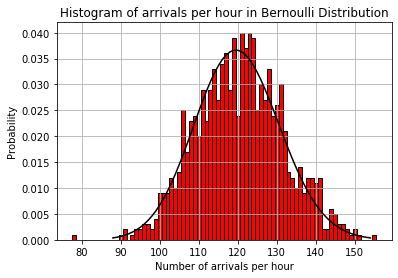

Mean for bernoulli distribution:  120.482


In [63]:
#Q2. Arrivals to freeway ramp

import random
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

span = 10000
prob = 120/span
trials = 1000
ber = []
for j in range(trials):
    num = 0
    for i in range(span):
        trial = np.random.sample()
        if trial < prob:
            num += 1
    ber.append(num)
    
     
binwidth = 1
bins = np.arange(min(ber)-0.5,max(ber)+0.5+binwidth,binwidth) 
x = np.arange(sp.binom.ppf(0.001, span, prob), sp.binom.ppf(0.999, span, prob))
plt.hist(ber, bins, density = True, color = 'r', edgecolor = 'k')
plt.plot(x, sp.binom.pmf(x, span, prob), color = 'k')
plt.title("Histogram of arrivals per hour in Bernoulli Distribution")
plt.xlabel("Number of arrivals per hour")
plt.ylabel("Probability")
plot.grid(True)
plt.show()

print("Mean for bernoulli distribution: ", np.mean(ber))

# Poisson

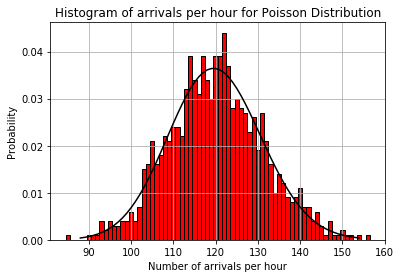

Mean for Poisson distribution:  120.053


In [64]:
avg = 120
trials = 1000
pois = []
for i in range(trials):
    inv = math.exp(-avg)
    j = 0
    temp = inv
    trial = np.random.sample()
    while 1:
        if trial < temp:
            pois.append(j)
            break
        else:
            inv = avg*inv/(j+1)
            temp += inv
            j += 1

binwidth = 1
bins = np.arange(min(pois)-0.5,max(pois)+0.5+binwidth,binwidth)
x = np.arange(sp.poisson.ppf(0.001, avg), sp.poisson.ppf(0.999, avg))
plt.hist(pois, bins, density = True, color = 'r', edgecolor='k')
plt.plot(x, sp.poisson.pmf(x, avg), color = 'k')
plt.title("Histogram of arrivals per hour for Poisson Distribution")
plt.xlabel("Number of arrivals per hour")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

print("Mean for Poisson distribution: ", np.mean(pois))

# Problem 3

For 100 samples, E[N] = 8.59


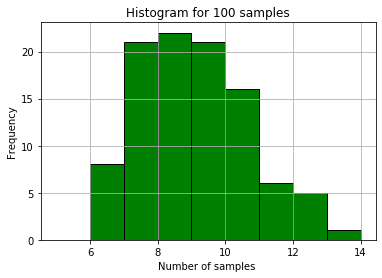

For 1000 samples, E[N] = 8.641


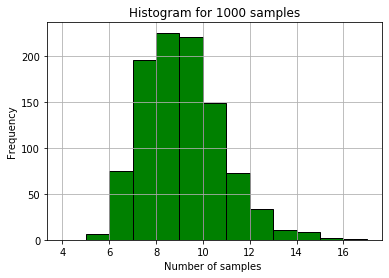

For 10000 samples, E[N] = 8.6766


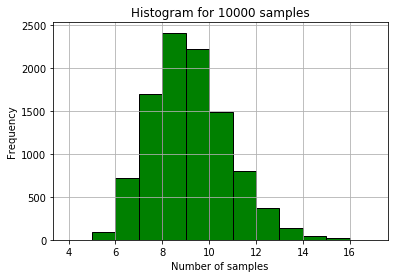

In [65]:
#Q3. Smallest number of uniform random variables whose sum is greater than 4

import numpy as np
import matplotlib.pyplot as plt


def rand_var():
    size = np.array([100, 1000, 10000])
    for i in size:
        samp = uni_rand(i)
        histo(samp, i)
        print('For ' + str(i) + ' samples, E[N] =', np.mean(samp))
        plt.show()

def uni_rand(size):
    lst = []
    for i in range(size):
        n = 0
        count = 0
        while n <= 4:
            n += np.random.sample()
            count += 1
        lst.append(count)
    return lst

def histo(samp, size):
    plt.figure(size)
    bins = range(min(samp) - 1, max(samp) + 2)
    plt.hist(samp, bins, color = 'g' , edgecolor = 'k')
    plt.title('Histogram for ' + str(size) + ' samples')
    plt.xlabel('Number of samples ')
    plt.ylabel('Frequency')
    plot.grid(True)

rand_var()

# Problem 4

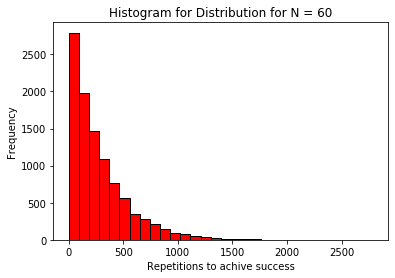

Theoretical E[N60] =  280.79222477710414
Theoretical V[N60] =  78563.48127049867
Estimate E[N60] = 282.5289
Estimate var[N60] = 78721.07036479


In [66]:
#Q4. Producing sequence Xk

import numpy as np
import matplotlib.pyplot as plt

seq = 0
for i in range(1, 61):
    seq += (1/i)
p = 1/seq
th = p/60
mean = 1/th
Var = (1-th)/(th*th)

total = []
for i in range(10000):
    num = 0
    while True:
        rand_num = np.random.sample()
        num += 1
        if rand_num < p/60:
            total.append(num)
            break
            
plt.hist(total, 30 , color='r', edgecolor='k')
plt.title('Histogram for Distribution for N = 60')
plt.xlabel('Repetitions to achive success')
plt.ylabel('Frequency')
plt.show()

print("Theoretical E[N60] = ", mean)
print("Theoretical V[N60] = ", Var)
print('Estimate E[N60] =', np.mean(total))
print('Estimate var[N60] =', np.var(total))


# Problem 5

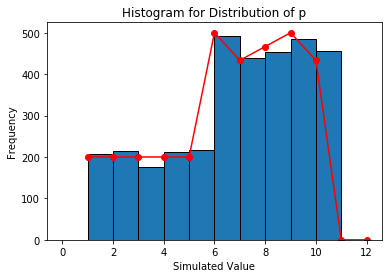

Theoretical Expectation:  6.4799999999999995
Theoretical Variance:  7.1895999999999995
Theoretical Efficiency:  0.3333333333333333

sample mean = 6.467443249701314
sample variance = 7.2931455538283885
efficiency = 0.3348


In [89]:
#Q5. Accept reject method

import numpy as np
import matplotlib.pyplot as plt


p = [0.06]*5+[0.15, 0.13, 0.14, 0.15, 0.13]+[0]*10
q = [0.05]*20
c = 3
trials = 10000
accept = []

mean = 0.06*(1+2+3+4+5) + 0.15*(6+9) + 0.13*(7+10) + 0.14*8
effi = 1/c
var = 0
for i in range(10):
    var += p[i]*((mean - (i+1))**2)

for i in range(trials):
    x = np.random.randint(20)
    y = np.random.sample()
    if y < p[x]/(c*q[x]):
        accept.append(x+1)
        
pts=np.empty([12,1])
for i in range(12):
    pts[i] = np.array([p[i]*trials/c])

plt.figure()
plt.hist(accept, bins=range(13), edgecolor='black')
plt.plot(range(1, 13), pts, marker='o', color='r')
plt.xlabel('Simulated Value')
plt.ylabel('Frequency')
plt.title('Histogram for Distribution of p')
plt.show()

print("Theoretical Expectation: ", mean)
print("Theoretical Variance: ", var)
print("Theoretical Efficiency: ", effi)

print('\nsample mean =', np.mean(accept))
print('sample variance =', np.var(accept))
print('efficiency =', len(accept)/trials)